# WeatherPy
----

#### Observable Insights
* Max Temp appears to increase as latitude approaches the value 0.
* There appears to be a weak relationship between max temperature and latitude in both the northern and southern hemisphere (R squared = 0.48 and 0.67, respectively)
* The regression modeling suggests that there is no relationship between humidity, wind speed, or cloudiness vs. latitude in the northern and southern hemisphere.

In [89]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [7]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
# np.random.seed(1234)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it's being processed (with the city number and city name).


In [10]:
# Base url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Create Cities Data Frame
cities_df = pd.DataFrame({"City": cities})
cities_df['Lat']=''
cities_df['Lng']=''
cities_df['Max Temp']=''
cities_df['Humidity']=''
cities_df['Cloudiness']=''
cities_df['Wind Speed']=''
cities_df['Country']=''
cities_df['Date']=''

# See JSON format
city = "severo-kurilsk"
query_url = url + "appid=" + weather_api_key + "&q=" + city
weather_json = requests.get(query_url).json()
pprint(weather_json)

{'base': 'stations',
 'clouds': {'all': 65},
 'cod': 200,
 'coord': {'lat': 50.68, 'lon': 156.12},
 'dt': 1593112717,
 'id': 2121385,
 'main': {'feels_like': 277.29,
          'grnd_level': 1013,
          'humidity': 74,
          'pressure': 1014,
          'sea_level': 1014,
          'temp': 281.88,
          'temp_max': 281.88,
          'temp_min': 281.88},
 'name': "Severo-Kuril'sk",
 'sys': {'country': 'RU', 'sunrise': 1593105851, 'sunset': 1593165140},
 'timezone': 39600,
 'weather': [{'description': 'broken clouds',
              'icon': '04d',
              'id': 803,
              'main': 'Clouds'}],
 'wind': {'deg': 291, 'speed': 4.77}}


In [85]:
# Iterate through city name
print("Beginning Data Retrieval")
print("-----------------------------")

record_count = 1
# set_count=1

# for i, city in enumerat(cities):
#     if (i % 50 ==0 and i>= 50):
#         set_count +=1
#         record_count = 0

for index, row in cities_df.iterrows():      
    # get city through DF
    city = row["City"]
    # build query url and make API request to extract results
    query_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=imperial"
    weather_json = requests.get(query_url).json()
    
    try: 
        print(f"Processing record {record_count} of {len(cities)} | {city}")
        cities_df.loc[index, 'Lat'] = weather_json['coord']['lat']
        cities_df.loc[index, 'Lng'] = weather_json['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = weather_json['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = weather_json['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = weather_json['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = weather_json['wind']['speed']
        cities_df.loc[index, 'Country'] = weather_json['sys']['country']
        cities_df.loc[index, 'Date'] = weather_json['dt']
    except (KeyError, IndexError):
        print("City not found. Skipping...")
    record_count += 1
        
print('''-----------------------------
Data Retrieval Complete      
-----------------------------''')

Beginning Data Retrieval
-----------------------------
Processing record 1 of 637 | severo-kurilsk
Processing record 2 of 637 | bredasdorp
Processing record 3 of 637 | albany
Processing record 4 of 637 | rikitea
Processing record 5 of 637 | kruisfontein
Processing record 6 of 637 | chokurdakh
Processing record 7 of 637 | grand-lahou
Processing record 8 of 637 | kapaa
Processing record 9 of 637 | victoria
Processing record 10 of 637 | puerto ayora
Processing record 11 of 637 | saskylakh
Processing record 12 of 637 | mbandaka
Processing record 13 of 637 | searcy
Processing record 14 of 637 | makokou
Processing record 15 of 637 | arraial do cabo
Processing record 16 of 637 | ostrovnoy
Processing record 17 of 637 | egvekinot
Processing record 18 of 637 | arlit
Processing record 19 of 637 | saint-philippe
Processing record 20 of 637 | carnarvon
Processing record 21 of 637 | naze
Processing record 22 of 637 | san juan
Processing record 23 of 637 | tandalti
Processing record 24 of 637 | port 

Processing record 208 of 637 | ziro
Processing record 209 of 637 | yar-sale
Processing record 210 of 637 | khatanga
Processing record 211 of 637 | lakatoro
Processing record 212 of 637 | berbera
Processing record 213 of 637 | mitzic
Processing record 214 of 637 | yellowknife
Processing record 215 of 637 | nizhnevartovsk
Processing record 216 of 637 | lebu
Processing record 217 of 637 | gusinoye ozero
Processing record 218 of 637 | conde
Processing record 219 of 637 | grindavik
Processing record 220 of 637 | tiksi
Processing record 221 of 637 | belaya gora
Processing record 222 of 637 | dingle
Processing record 223 of 637 | maraa
Processing record 224 of 637 | ekhabi
Processing record 225 of 637 | albanel
Processing record 226 of 637 | hambantota
Processing record 227 of 637 | sadovoye
Processing record 228 of 637 | dalvik
Processing record 229 of 637 | lavrentiya
Processing record 230 of 637 | nome
Processing record 231 of 637 | rakiv lis
Processing record 232 of 637 | angoche
Processi

Processing record 414 of 637 | campo gobierno
Processing record 415 of 637 | marathon
Processing record 416 of 637 | winthrop
Processing record 417 of 637 | cotonou
Processing record 418 of 637 | comodoro rivadavia
Processing record 419 of 637 | namibe
Processing record 420 of 637 | tara
Processing record 421 of 637 | fairbanks
Processing record 422 of 637 | cockburn town
Processing record 423 of 637 | pingzhuang
Processing record 424 of 637 | dvinskoy
Processing record 425 of 637 | dudinka
Processing record 426 of 637 | lagoa
Processing record 427 of 637 | iquitos
Processing record 428 of 637 | hay river
Processing record 429 of 637 | paita
Processing record 430 of 637 | akureyri
Processing record 431 of 637 | taltal
Processing record 432 of 637 | tomatlan
Processing record 433 of 637 | waipawa
Processing record 434 of 637 | harwich
Processing record 435 of 637 | kushima
Processing record 436 of 637 | myatlevo
Processing record 437 of 637 | port blair
Processing record 438 of 637 | es

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [98]:
# Drop rows with empty strings
nan_value = float("NaN")
cities_df.replace("", nan_value, inplace=True)
cities_df.dropna(how = 'any',inplace = True)

# Reset index
# cities_df.reset_index(inplace = True) 

#Del extra columns
# del cities_df['level_0']
# del cities_df['index']

# Display DF
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.68,156.12,49.39,62.0,9.0,10.36,RU,1.593258e+09
1,bredasdorp,-34.53,20.04,59.00,87.0,53.0,21.92,ZA,1.593258e+09
2,albany,42.60,-73.97,66.00,74.0,95.0,3.89,US,1.593258e+09
3,rikitea,-23.12,-134.97,72.21,79.0,15.0,13.18,PF,1.593258e+09
4,kruisfontein,-34.00,24.73,67.73,31.0,0.0,15.21,ZA,1.593258e+09


In [99]:
# Change date format 
def convert(n): 
    return time.strftime("%m/%d/%y", time.gmtime(n)) 

for index, row in cities_df.iterrows():      
    # Get date at each row
    date = row["Date"]
    formatted_date = convert(date)
    cities_df["Date"]=formatted_date

cities_df['Date'].value_counts()
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,severo-kurilsk,50.68,156.12,49.39,62.0,9.0,10.36,RU,06/27/20
1,bredasdorp,-34.53,20.04,59.00,87.0,53.0,21.92,ZA,06/27/20
2,albany,42.60,-73.97,66.00,74.0,95.0,3.89,US,06/27/20
3,rikitea,-23.12,-134.97,72.21,79.0,15.0,13.18,PF,06/27/20
4,kruisfontein,-34.00,24.73,67.73,31.0,0.0,15.21,ZA,06/27/20


In [159]:
# Export city data to CSV
cities_df.to_csv(output_data_file)

In [101]:
# Count number of records in DF
cities_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [103]:
cities_df[["Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed", "Country"]].describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,589.00000,589.000000,589.000000,589.000000,589.000000,589.000000
mean,20.31708,18.012071,70.284550,69.726655,55.137521,8.044975
std,33.04901,90.460400,16.025727,23.587909,36.644966,5.446044
min,-54.80000,-179.170000,23.000000,3.000000,0.000000,0.450000
25%,-6.64000,-63.180000,60.010000,56.000000,20.000000,3.870000
50%,21.85000,19.930000,74.530000,76.000000,68.000000,6.930000
75%,49.65000,99.180000,80.600000,88.000000,90.000000,11.410000
max,78.22000,179.320000,114.660000,100.000000,100.000000,29.620000


In [64]:
cities_df[cities_df.Humidity > 100]
print("There are no cities that have humidity > 100%.")

There are no cities that have humidity > 100%.


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

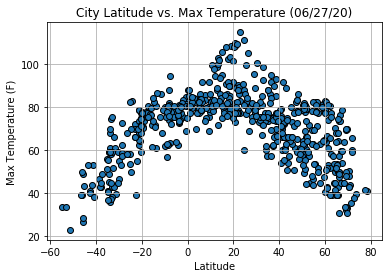

In [134]:
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Max Temp'].astype('float')
plt.scatter(x_values,y_values, edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("City Latitude vs. Max Temperature (06/27/20)")
plt.grid()

plt.savefig("../output_data/lat_vs_temp.png")

In [145]:
print("Max Temp appears to increase as latitude approaches the value 0.")

Max Temp appear to increase as latitude approaches the value 0.


## Latitude vs. Humidity Plot

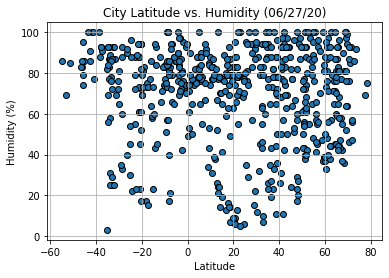

In [135]:
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Humidity'].astype('float')
plt.scatter(x_values,y_values, edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (06/27/20)")
plt.grid()

plt.savefig("../output_data/lat_vs_hum.png")

In [147]:
print("There seems to be weak correlation between latitude and humidity.")

There seems to be weak correlation between latitude and humidity.


## Latitude vs. Cloudiness Plot

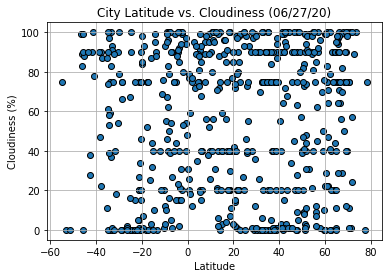

In [136]:
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Cloudiness'].astype('float')
plt.scatter(x_values,y_values, edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs. Cloudiness (06/27/20)")
plt.grid()

plt.savefig("../output_data/lat_vs_cloud.png")

In [148]:
print("There seems to be weak correlation between latitude and cloudiness.")

There seems to be weak correlation between latitude and cloudiness.


## Latitude vs. Wind Speed Plot

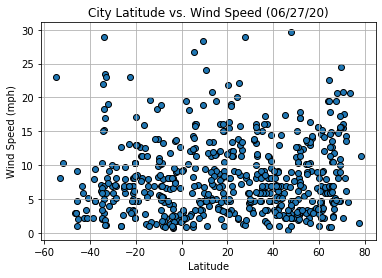

In [137]:
x_values = cities_df['Lat'].astype('float')
y_values = cities_df['Wind Speed'].astype('float')
plt.scatter(x_values,y_values, edgecolors ='black')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("City Latitude vs. Wind Speed (06/27/20)")
plt.grid()

plt.savefig("../output_data/lat_vs_wind.png")

In [149]:
print("There seems to be weak correlation between latitude and wind speed.")

There seems to be weak correlation between latitude and wind speed.


## Linear Regression

In [14]:
# OPTIONAL: Create a function to create Linear Regression plots

In [113]:
# Create Northern and Southern Hemisphere DataFrames
north_hem_df = cities_df.loc[cities_df["Lat"] > 0,:]
south_hem_df = cities_df.loc[cities_df["Lat"] < 0,:]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,bredasdorp,-34.53,20.04,59.00,87.0,53.0,21.92,ZA,06/27/20
3,rikitea,-23.12,-134.97,72.21,79.0,15.0,13.18,PF,06/27/20
4,kruisfontein,-34.00,24.73,67.73,31.0,0.0,15.21,ZA,06/27/20
9,puerto ayora,-0.74,-90.35,69.01,93.0,54.0,1.99,EC,06/27/20
14,arraial do cabo,-22.97,-42.03,69.80,88.0,0.0,3.36,BR,06/27/20


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.47685201119144677
There appears to be a weak relationship between max temperature and latitude in the northern hemisphere. 


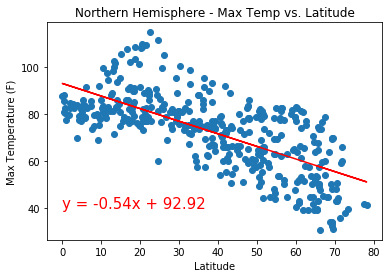

In [151]:
x_values = north_hem_df['Lat'].astype('float')
y_values = north_hem_df['Max Temp'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,40),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Northern Hemisphere - Max Temp vs. Latitude")

print(f"R squared: {rvalue**2}")
print("There appears to be a weak relationship between max temperature and latitude in the northern hemisphere. ")

plt.savefig("../output_data/north_lat_vs_temp.png")



####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

R squared: 0.6664259029189141
There appears to be a weak relationship between max temperature and latitude in the southern hemisphere. 


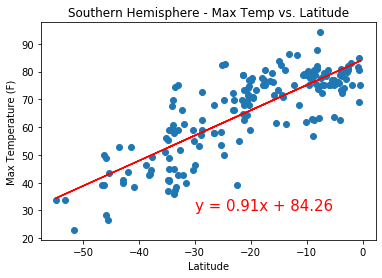

In [152]:
x_values = south_hem_df['Lat'].astype('float')
y_values = south_hem_df['Max Temp'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title("Southern Hemisphere - Max Temp vs. Latitude")

print(f"R squared: {rvalue**2}")
print("There appears to be a weak relationship between max temperature and latitude in the southern hemisphere. ")

plt.savefig("../output_data/south_lat_vs_temp.png")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 0.0017713569871128368
The regression modeling suggests that there is no relationship between humidity and latitude in the northern hemisphere. 


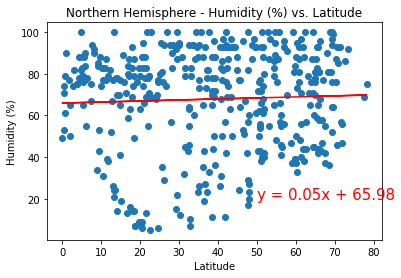

In [153]:
x_values = north_hem_df['Lat'].astype('float')
y_values = north_hem_df['Humidity'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Northern Hemisphere - Humidity (%) vs. Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling suggests that there is no relationship between humidity and latitude in the northern hemisphere. ")

plt.savefig("../output_data/north_lat_vs_hum.png")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

R squared: 3.768060565292559e-05
The regression modeling suggests that there is no relationship between humidity and latitude in the southern hemisphere. 


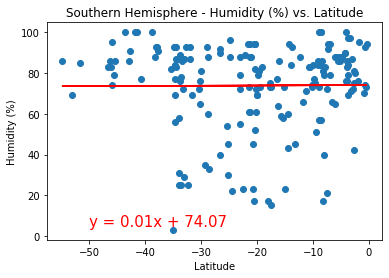

In [154]:
x_values = south_hem_df['Lat'].astype('float')
y_values = south_hem_df['Humidity'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("Southern Hemisphere - Humidity (%) vs. Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling suggests that there is no relationship between humidity and latitude in the southern hemisphere. ")

plt.savefig("../output_data/south_lat_vs_hum.png")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0005411813724125113
The regression modeling suggests that there is no relationship between cloudiness and latitude in the northern hemisphere. 


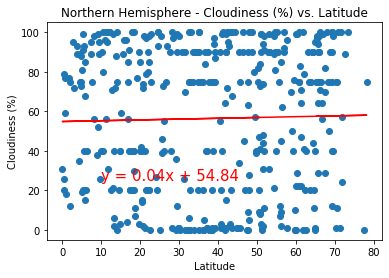

In [155]:
x_values = north_hem_df['Lat'].astype('float')
y_values = north_hem_df['Cloudiness'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,25),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling suggests that there is no relationship between cloudiness and latitude in the northern hemisphere. ")

plt.savefig("../output_data/north_lat_vs_cloud.png")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

R squared: 0.0025903835639177635
The regression modeling suggests that there is no relationship between cloudiness and latitude in the southern hemisphere. 


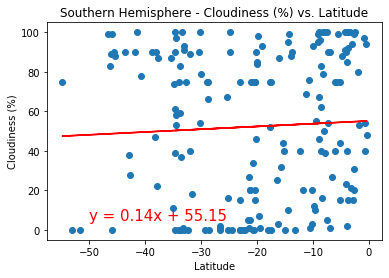

In [156]:
x_values = south_hem_df['Lat'].astype('float')
y_values = south_hem_df['Cloudiness'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,5),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling suggests that there is no relationship between cloudiness and latitude in the southern hemisphere. ")

plt.savefig("../output_data/south_lat_vs_cloud.png")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.00011037238345829145
The regression modeling suggests that there is no relationship between wind speed and latitude in the northern hemisphere. 


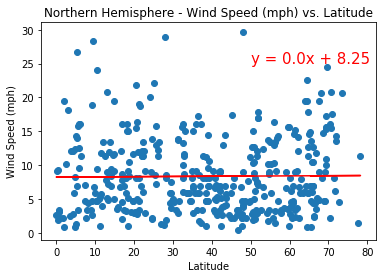

In [157]:
x_values = north_hem_df['Lat'].astype('float')
y_values = north_hem_df['Wind Speed'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,25),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling suggests that there is no relationship between wind speed and latitude in the northern hemisphere. ")

plt.savefig("../output_data/north_lat_vs_wind.png")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

R squared: 0.011483607123280979
The regression modeling suggests that there is no relationship between wind speed and latitude in the southern hemisphere. 


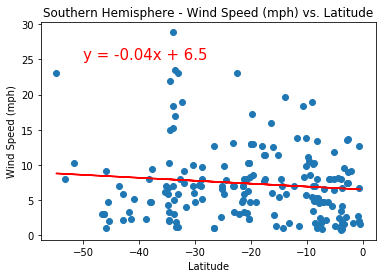

In [158]:
x_values = south_hem_df['Lat'].astype('float')
y_values = south_hem_df['Wind Speed'].astype('float')

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,25),fontsize=15,color="red")

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude")

print(f"R squared: {rvalue**2}")
print("The regression modeling suggests that there is no relationship between wind speed and latitude in the southern hemisphere. ")

plt.savefig("../output_data/south_lat_vs_wind.png")